# Code to generate all figures on heatwaves events used in the paper
## note this is spread across multiple figures
## TODO: Update the specific list once we are done

In [7]:
%load_ext autoreload
%autoreload 2

# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns
from extremeweatherbench import evaluate, utils, cases, defaults, inputs, metrics, regions
sns.set_theme(style='whitegrid')
import shapely
from pathlib import Path
import multiprocessing
import xarray as xr
from matplotlib.lines import Line2D

# make the basepath - change this to your local path
basepath = Path.home() / 'ExtremeWeatherBench' / ''
basepath = str(basepath) + '/'

# ugly hack to load in our plotting scripts
import sys
sys.path.append(basepath + "/docs/notebooks/")
import case_plotting as cp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# setup the templates to load in the data

# Forecast Examples
cira_heatwave_forecast_FOURv2_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA FOURv2 IFS",
)

cira_heatwave_forecast_GC_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA GC IFS",
)

cira_heatwave_forecast_PANG_IFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA PANG IFS",
)

cira_heatwave_forecast_FOURv2_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA FOURv2 GFS",
)

cira_heatwave_forecast_GC_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA GC GFS",
)

cira_heatwave_forecast_PANG_GFS = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_GFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
    name="CIRA PANG GFS",
)

hres_forecast = inputs.ZarrForecast(
    source="gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr",
    variables=["surface_air_temperature"],
    variable_mapping=inputs.HRES_metadata_variable_mapping,
    storage_options={"remote_options": {"anon": True}},
    name="ECMWF HRES",
)

heat_metrics = [
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ]

FOURv2_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2_GFS, 
    ),
]

GC_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC_GFS, 
    ),
]

PANG_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_GFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_IFS, 
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG_GFS, 
    ),
]

HRES_HEAT_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.ghcn_heatwave_target,
        forecast=hres_forecast,
    ),
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=heat_metrics,
        target=defaults.era5_heatwave_target,
        forecast=hres_forecast,
    ),
]

# load in all of the events in the yaml file
ewb_cases = cases.load_ewb_events_yaml_into_case_collection()
ewb_cases.cases = ewb_cases.select_cases('event_type', 'heat_wave')

ewb_fourv2 = evaluate.ExtremeWeatherBench(ewb_cases, FOURv2_HEAT_EVALUATION_OBJECTS)
ewb_gc = evaluate.ExtremeWeatherBench(ewb_cases, GC_HEAT_EVALUATION_OBJECTS)
ewb_pang = evaluate.ExtremeWeatherBench(ewb_cases, PANG_HEAT_EVALUATION_OBJECTS)
ewb_hres = evaluate.ExtremeWeatherBench(ewb_cases, HRES_HEAT_EVALUATION_OBJECTS)

In [4]:
# make a global color palatte so things are consistent across plots
sns_palette = sns.color_palette("tab10")
sns.set_style("whitegrid")

# defaults for plotting
fourv2_style = {'color': sns_palette[0]}
gc_style = {'color': sns_palette[2]}
pangu_style = {'color': sns_palette[3]}
hres_style = {'color': 'black'}

# the group styles and settings so that we can just easily grab them for the plots and they are globally consistent

ghcn_group_style = {'linestyle':'-', 'marker':'o', 'group':'GHCN'}
era5_group_style = {'linestyle':'--', 'marker':'s', 'group':'ERA5'}

ifs_group_style = {'linestyle':'-', 'marker':'o', 'group':'IFS'}
gfs_group_style = {'linestyle':':', 'marker':'d', 'group':'GFS'}

global_group_style = {'linestyle':'--', 'marker':'*', 'group':'Global'}

hres_group_style = {'linestyle':'-', 'marker':'.', 'group':'HRES'}

# settings for the different models
fourv2_ifs_cira_settings = {'forecast_source':'CIRA FOURv2 IFS', 'label_str': 'ForecastNet V2'} 
fourv2_gfs_cira_settings = {'forecast_source':'CIRA FOURv2 GFS', 'label_str': 'ForecastNet V2'} 
gc_ifs_cira_settings = {'forecast_source':'CIRA GC IFS', 'label_str': 'GraphCast'} 
gc_gfs_cira_settings = {'forecast_source':'CIRA GC GFS', 'label_str': 'GraphCast'} 
pangu_ifs_cira_settings = {'forecast_source':'CIRA PANG IFS', 'label_str': 'Pangu Weather'} 
pangu_gfs_cira_settings = {'forecast_source':'CIRA PANG GFS', 'label_str': 'Pangu Weather'} 

hres_ifs_settings = {'forecast_source':'ECMWF HRES', 'label_str': 'HRES'} 


# you can either load in your results from scratch or you can load them from a saved pickle file (must faster)

In [8]:
# set this to true to make the results from scratch (it is slow)
load_results = True

if (load_results):
    # load the results back in
    fourv2_results = pd.read_pickle(basepath + 'docs/notebooks/figs/fourv2_heat_results.pkl')
    pang_results = pd.read_pickle(basepath + 'docs/notebooks/figs/pang_heat_results.pkl')
    hres_results = pd.read_pickle(basepath + 'docs/notebooks/figs/hres_heat_results.pkl')
    gc_results = pd.read_pickle(basepath + 'docs/notebooks/figs/gc_heat_results.pkl')
else:
    # load in the results for all heat waves in parallel
    # this will take awhile to run if you do them all in one code box 
    # if you have already saved them (from running this once), then skip this box
    n_threads_per_process = 4
    n_processes = max(1, multiprocessing.cpu_count() // n_threads_per_process)

    fourv2_results = ewb_fourv2.run(parallel=True, n_jobs=n_processes, pre_compute=True)
    gc_results = ewb_gc.run(parallel=True, n_jobs=n_processes, pre_compute=True)
    pang_results = ewb_pang.run(parallel=True, n_jobs=n_processes, pre_compute=True)
    hres_results = ewb_hres.run(parallel=True, n_jobs=n_processes, pre_compute=True)

    # save the results to make it more efficient
    fourv2_results.to_pickle(basepath + 'docs/notebooks/figs/fourv2_heat_results.pkl')
    gc_results.to_pickle(basepath + 'docs/notebooks/figs/gc_heat_results.pkl')
    pang_results.to_pickle(basepath + 'docs/notebooks/figs/pang_heat_results.pkl')
    hres_results.to_pickle(basepath + 'docs/notebooks/figs/hres_heat_results.pkl')

# plotting and subsetting code

In [9]:
def subset_results_to_xarray(results_df, forecast_source, target_source, metric, init_time=None, case_id_list=None):
    """
    takes in one of the overall results tables and returns a multi-dimensional xarray for easier plotting 
    """
    # if the case_id_list is not empty, subset to the specific cases
    if (case_id_list is not None):
        subset = results_df[(results_df['forecast_source']==forecast_source) & (results_df['target_source']==target_source) & 
                            (results_df['metric'] == metric) & (results_df['case_id_number'].isin(case_id_list))]
    else:
        subset = results_df[(results_df['forecast_source']==forecast_source) & (results_df['target_source']==target_source) & (results_df['metric'] == metric)]

    subset = subset.astype({'lead_time':'timedelta64[ns]'})

    # if the init time is specified, subset that
    if (init_time == 'zeroz'):
        # convert to a timedelta object so we can grab zeroz
        subset = subset[subset['lead_time'].dt.seconds % 86400 == 0]
    elif (init_time == 'twelvez'):
        subset = subset[subset['lead_time'].dt.seconds % 86400 == 43200]

    # prepare for xarray conversion
    subset2 = subset.set_index(['lead_time', 'case_id_number']).sort_index()
    subset_xa = subset2.to_xarray()

    return subset_xa

def plot_results_by_metric(data, settings, title, filename=None, show_all_in_legend=False):
    """
    Plots the results of the ExtremeWeatherBench for the data specified
    parameters:
        data: list of dictionaries containing the data to plot
        settings: list of dictionaries containing the settings for the plot
        title: string, the title of the plot
        filename: string, the filename to save the plot to (None if you don't want to save it   )
        show_all_in_legend: boolean, if True, then all of the labels will be shown in the legend, if False they will be grouped
    """
    sns.set_theme(style='whitegrid')
    sns_palette = sns.color_palette("tab10")
    fig, ax = plt.subplots(figsize=(16,4))
    
    legend_elements = []
    legend_labels = list()

    # and add the HRES line
    for my_settings in settings:
        if (show_all_in_legend):
            my_label = f"{my_settings['label_str']} (n={my_n})"
        else:
            my_label = my_settings['label_str']

        if ("HRES" in my_label):
            legend_elements.append(Line2D([0], [0], color=hres_style['color'], lw=2, label=my_label))
            break

    # Add a blank line to your legend_elements list
    legend_elements.append(Line2D([0], [0], color='white', alpha=0, label=' '))


    for i, model in enumerate(data):
        my_mean = model['value'].mean('case_id_number')
        my_n = len(np.unique(model['case_id_number'].values))
        my_settings = settings[i]
        if (show_all_in_legend):
            my_label = f"{my_settings['label_str']} (n={my_n})"
        else:
            my_label = my_settings['label_str']

        plt.plot(my_mean, color=my_settings['color'], linewidth=2, label=my_label,
            linestyle=my_settings['linestyle'], marker=my_settings['marker'], markersize=10)
    
        # add any unique labels to the legend except for HRES (it gets its own line in the legend)
        if (show_all_in_legend or (my_label not in legend_labels and "HRES" not in my_label)):
            legend_labels.append(my_label)
            legend_elements.append(Line2D([0], [0], color=my_settings['color'], lw=2, label=my_label))


    # set the xticks in days    
    xtick_str = [f"{int(my_time/ np.timedelta64(1, 'D')):d}" for my_time in model['lead_time'].values]
    ax.set_xticks(labels=xtick_str, ticks=np.arange(0, len(model['lead_time']), 1))

    ax.set_ylabel('Celsius')
    ax.set_xlabel('Lead Time (days)')
    plt.title(title)

    # Add a blank line to your legend_elements list
    legend_elements.append(Line2D([0], [0], color='white', alpha=0, label=' '))

    # now add the unique groups with markers
    my_groups = list()
    for my_settings in settings:
        if (my_settings['group'] not in my_groups and my_settings['group'] != 'HRES'):
            my_groups.append(my_settings['group'])
            legend_elements.append(Line2D([0], [0], color='darkgrey', marker=my_settings['marker'], markersize=10, 
                label=my_settings['group'], linestyle=my_settings['linestyle'], linewidth=2))



    ax.legend(handles=legend_elements, loc="center left", bbox_to_anchor=(1.0, 0.5))

    if (filename is not None):
        plt.savefig(filename, bbox_inches='tight', dpi=300)

        


# example plots 

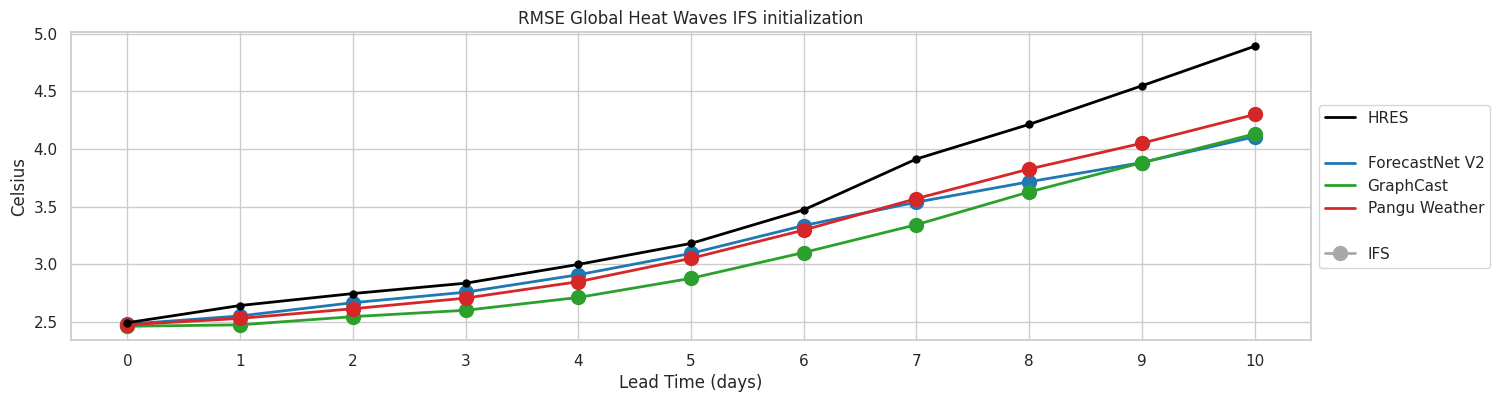

In [10]:
# plot the results for one metric for the three AI models versus HRES
fourv2_ifs_settings = fourv2_ifs_cira_settings | fourv2_style | ifs_group_style
gc_ifs_settings = gc_ifs_cira_settings | gc_style | ifs_group_style
pangu_ifs_settings = pangu_ifs_cira_settings | pangu_style | ifs_group_style
hres_settings = hres_ifs_settings | hres_style | hres_group_style

# subset the data for the plot
fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz')
hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz')

# plot the results
data = [fourv2_ifs_plot, gc_ifs_plot, pangu_ifs_plot, hres_plot]
settings = [fourv2_ifs_settings, gc_ifs_settings, pangu_ifs_settings, hres_settings]
plot_results_by_metric(data=data, settings=settings, title='RMSE Global Heat Waves IFS initialization')


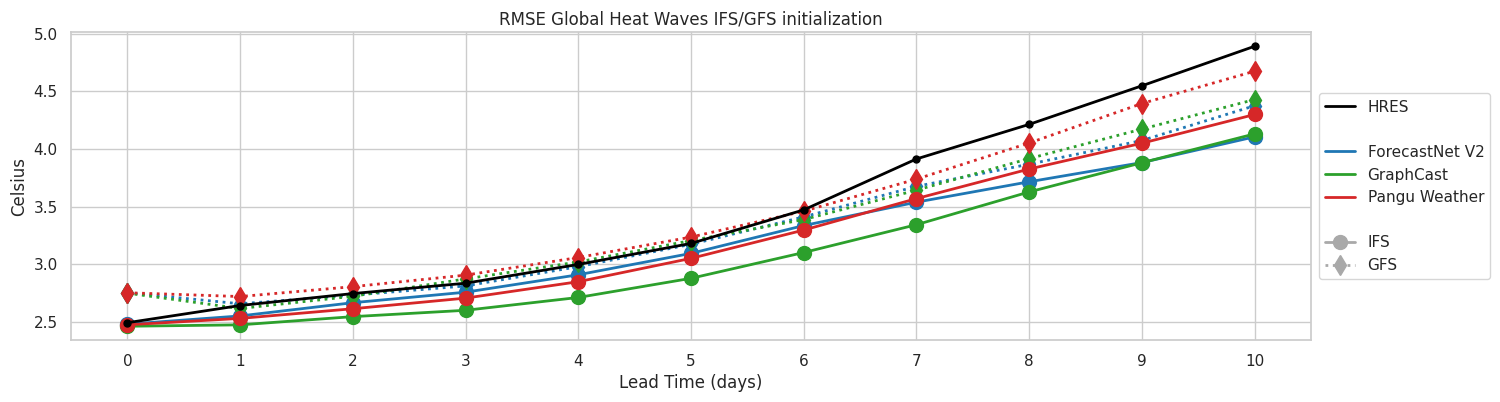

In [11]:
# compare IFS/GFS
# setup the settings for the plots      
fourv2_gfs_settings = fourv2_gfs_cira_settings | fourv2_style | gfs_group_style
gc_gfs_settings = gc_gfs_cira_settings | gc_style | gfs_group_style
pangu_gfs_settings = pangu_gfs_cira_settings | pangu_style | gfs_group_style

# subset the data for the plots
fourv2_gfs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_gfs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_gfs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_gfs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_gfs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_gfs_settings['forecast_source'], 
        target_source='GHCN', metric='rmse', init_time='zeroz')

# plot the results
data = [fourv2_ifs_plot, fourv2_gfs_plot, gc_ifs_plot, gc_gfs_plot, pangu_ifs_plot, pangu_gfs_plot, hres_plot]
settings = [fourv2_ifs_settings, fourv2_gfs_settings, gc_ifs_settings, gc_gfs_settings, pangu_ifs_settings, pangu_gfs_settings, hres_settings]
plot_results_by_metric(data=data, settings=settings, title='RMSE Global Heat Waves IFS/GFS initialization', show_all_in_legend=False)


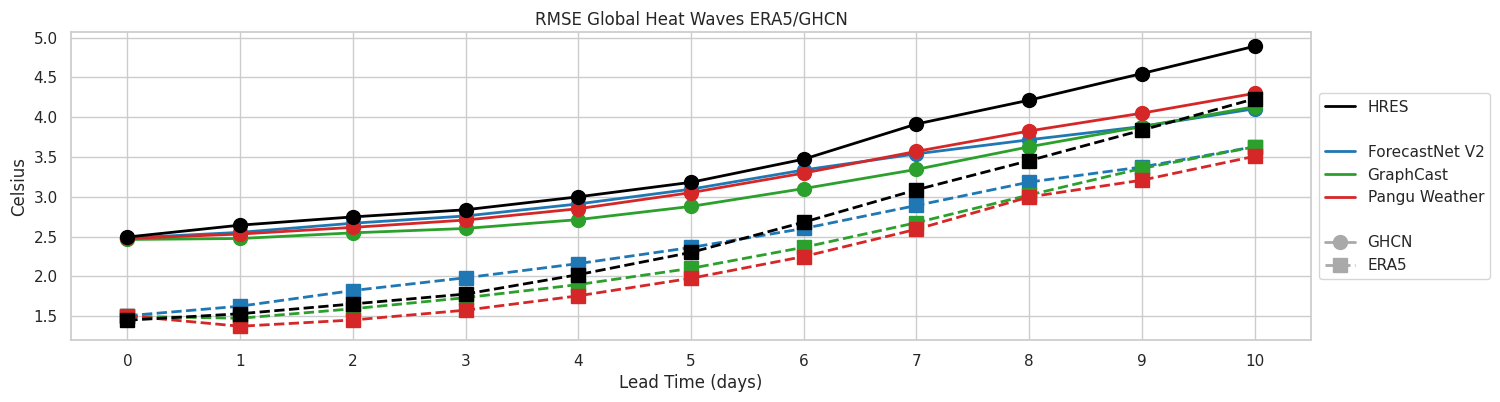

In [12]:
# plot ERA5 versus GHCN for IFS
fourv2_ifs_ghcn_settings = fourv2_ifs_cira_settings | fourv2_style | ghcn_group_style
gc_ifs_ghcn_settings = gc_ifs_cira_settings | gc_style | ghcn_group_style
pangu_ifs_ghcn_settings = pangu_ifs_cira_settings | pangu_style | ghcn_group_style
hres_ghcn_settings = hres_ifs_settings | hres_style | ghcn_group_style

fourv2_ifs_era5_settings = fourv2_ifs_cira_settings | fourv2_style | era5_group_style
gc_ifs_era5_settings = gc_ifs_cira_settings | gc_style | era5_group_style
pangu_ifs_era5_settings = pangu_ifs_cira_settings | pangu_style | era5_group_style
hres_era5_settings = hres_ifs_settings | hres_style | era5_group_style

# subset the data for the plots
fourv2_ifs_ghcn_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_ghcn_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz')
gc_ifs_ghcn_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_ghcn_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz')
pangu_ifs_ghcn_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_ghcn_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz')
hres_ghcn_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_ghcn_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz')

fourv2_ifs_era5_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_era5_settings['forecast_source'], 
                                                     target_source='ERA5', metric='rmse', init_time='zeroz')
gc_ifs_era5_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_era5_settings['forecast_source'], 
                                                 target_source='ERA5', metric='rmse', init_time='zeroz')
pangu_ifs_era5_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_era5_settings['forecast_source'],
                                           target_source='ERA5', metric='rmse', init_time='zeroz')
hres_era5_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_era5_settings['forecast_source'], 
                                    target_source='ERA5', metric='rmse', init_time='zeroz')

# plot the results
data = [fourv2_ifs_ghcn_plot, fourv2_ifs_era5_plot, gc_ifs_ghcn_plot, gc_ifs_era5_plot, 
    pangu_ifs_ghcn_plot, pangu_ifs_era5_plot, hres_ghcn_plot, hres_era5_plot]
settings = [fourv2_ifs_ghcn_settings, fourv2_ifs_era5_settings, gc_ifs_ghcn_settings, 
    gc_ifs_era5_settings, pangu_ifs_ghcn_settings, pangu_ifs_era5_settings, hres_ghcn_settings, hres_era5_settings]

plot_results_by_metric(data=data, settings= settings, title='RMSE Global Heat Waves ERA5/GHCN', show_all_in_legend=False)


# analysis at the regional level

North America Cases: [1, 2, 3, 4, 5, 6, 27, 72, 73, 74, 75, 76, 77, 79, 86]
Europe Cases: [8, 9, 10, 14, 18, 19, 20, 21, 22, 83, 84, 85]
Australia Cases: [7, 26, 28, 29, 80]


/home/amy/ExtremeWeatherBench//docs/notebooks/case_plotting.py:468: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=12)


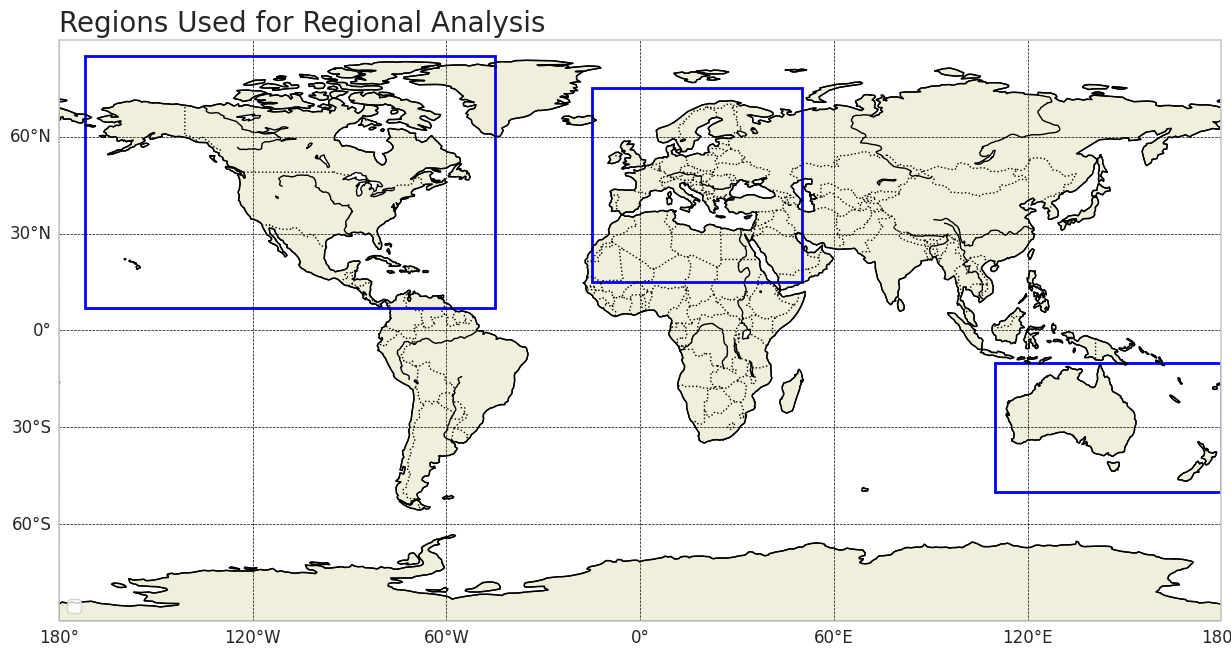

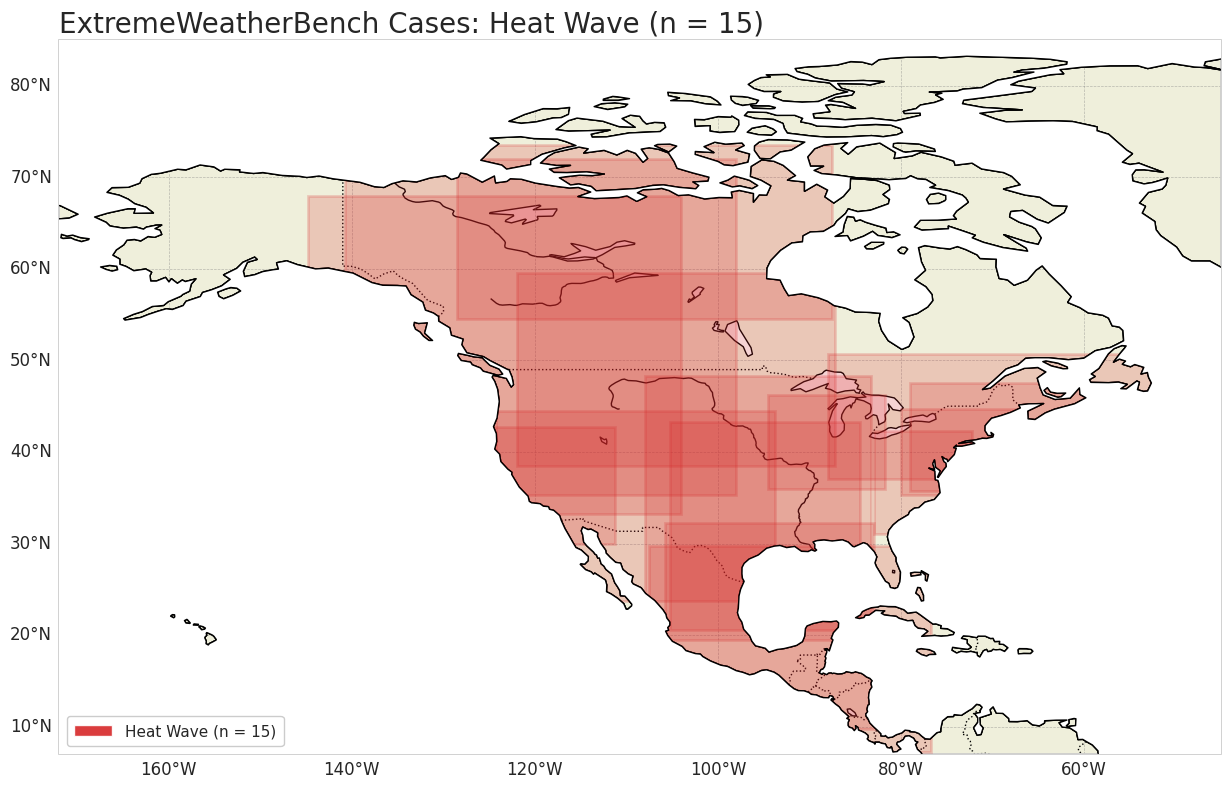

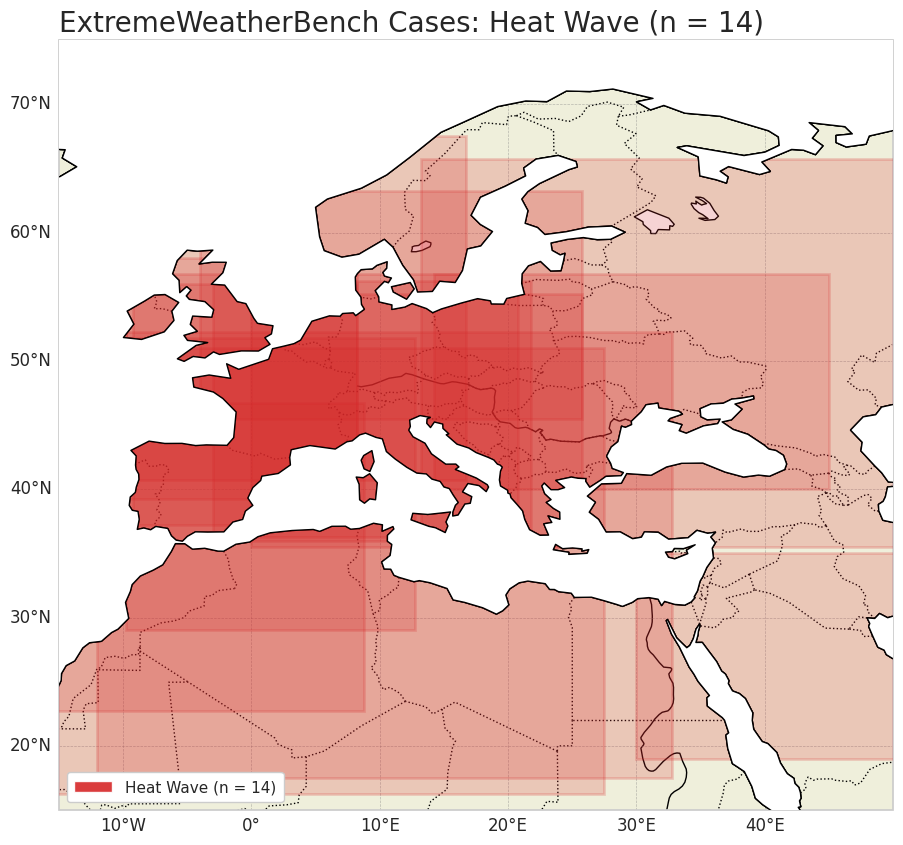

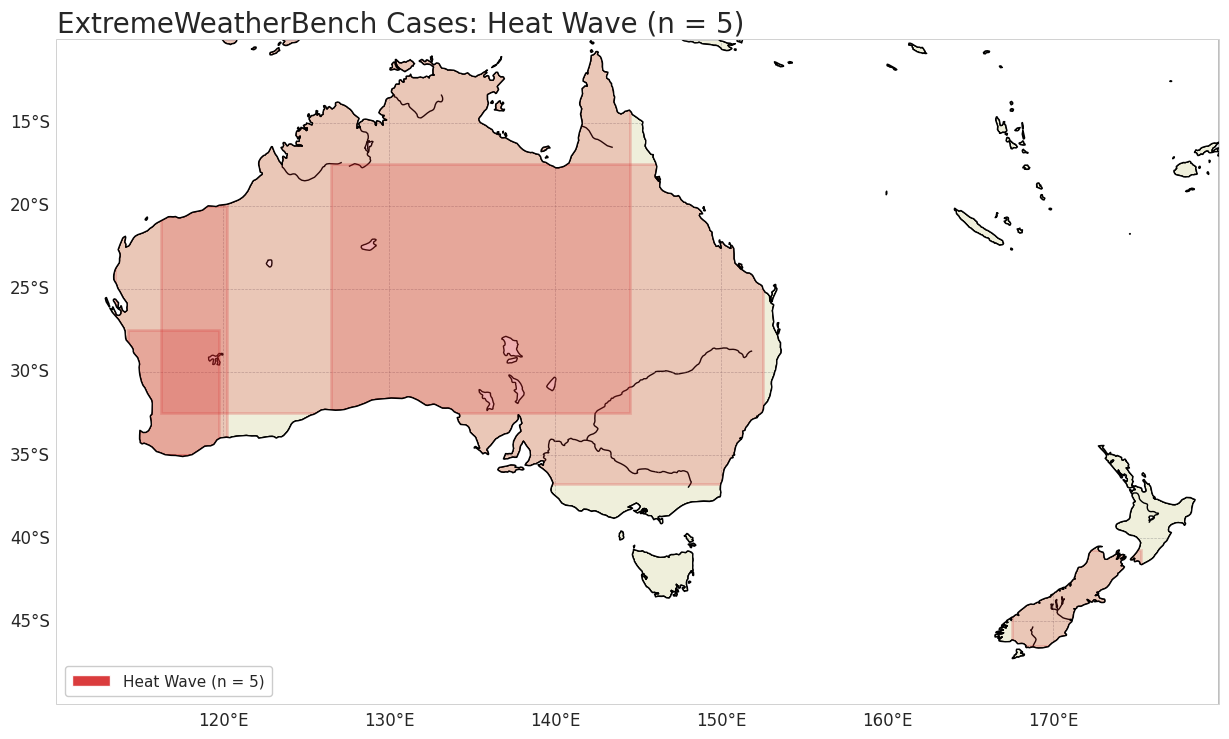

In [13]:
# make the bounding boxes for the regions

# North America
na_bounding_box = [-172, -45, 7, 85]
na_bounding_box_polygon = cp.get_polygon_from_bounding_box(na_bounding_box)
na_bounding_region = regions.BoundingBoxRegion(latitude_min=7, latitude_max=85, longitude_min=-172, longitude_max=-45)

# Europe bounding box
eu_bounding_box = [50, -15, 15, 75]
eu_bounding_box_polygon = cp.get_polygon_from_bounding_box(eu_bounding_box)
eu_bounding_region = regions.BoundingBoxRegion(latitude_min=50, latitude_max=75, longitude_min=-15, longitude_max=15)

# australia bounding box
au_bounding_box = [110, 180, -50, -10]
au_bounding_box_polygon = cp.get_polygon_from_bounding_box(au_bounding_box)
au_bounding_region = regions.BoundingBoxRegion(latitude_min=-50, latitude_max=-10, longitude_min=110, longitude_max=180)

# break the cases into different lists
na_subset = regions.RegionSubsetter(region=na_bounding_region, method='intersects').subset_case_collection(ewb_cases)
eu_subset = regions.RegionSubsetter(region=eu_bounding_region, method='intersects').subset_case_collection(ewb_cases)
au_subset = regions.RegionSubsetter(region=au_bounding_region, method='intersects').subset_case_collection(ewb_cases)

na_case_ids = [n.case_id_number for n in na_subset.cases]
eu_case_ids = [n.case_id_number for n in eu_subset.cases]
au_case_ids = [n.case_id_number for n in au_subset.cases]

print(f'North America Cases: {na_case_ids}')
print(f'Europe Cases: {eu_case_ids}')
print(f'Australia Cases: {au_case_ids}')

# plot the regions
cp.plot_boxes(
    box_list=[na_bounding_box_polygon, eu_bounding_box_polygon, au_bounding_box_polygon],
    box_names=['North America', 'Europe', 'Australia'],
    title='Regions Used for Regional Analysis',
    filename=basepath + 'docs/notebooks/figs/figure3_part1_regions.png'
)

# plot North America cases
cp.plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=na_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_NA.png', fill_boxes=True)

cp.plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=eu_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_EU.png', fill_boxes=True)

cp.plot_all_cases(ewb_cases, event_type='heat_wave', bounding_box=au_bounding_box, 
               filename=basepath + 'docs/notebooks/figs/extreme_weather_heat_cases_AU.png', fill_boxes=True)

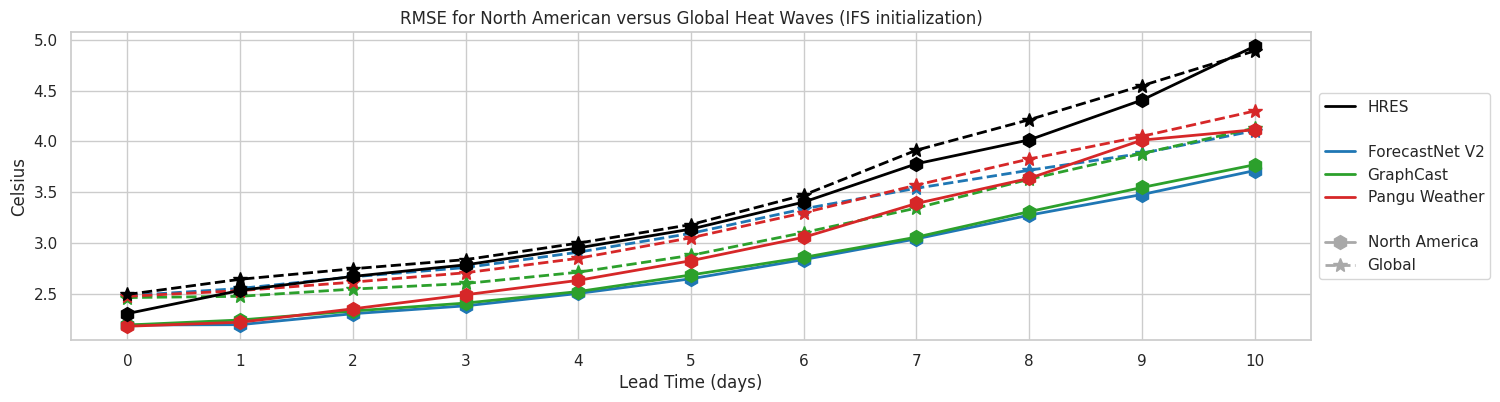

In [14]:
# create a group style for the local/global plots
na_group_style = {'linestyle':'-', 'marker':'h', 'group':'North America'}
eu_group_style = {'linestyle':'-', 'marker':'h', 'group':'Europe'}
au_group_style = {'linestyle':'-', 'marker':'h', 'group':'Australia'}

# plot the results for one metric for the three AI models versus HRES
na_fourv2_ifs_settings = fourv2_ifs_cira_settings | fourv2_style | na_group_style
na_gc_ifs_settings = gc_ifs_cira_settings | gc_style | na_group_style
na_pangu_ifs_settings = pangu_ifs_cira_settings | pangu_style | na_group_style
na_hres_settings = hres_ifs_settings | hres_style | na_group_style

# subset the data for the plots
na_fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_case_ids)
na_gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_case_ids)
na_pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_case_ids)
na_hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=na_case_ids)

# make a global settings so we can compare
fourv2_ifs_global_settings = fourv2_ifs_cira_settings | fourv2_style | global_group_style
pangu_ifs_global_settings = pangu_ifs_cira_settings | pangu_style | global_group_style
gc_ifs_global_settings = gc_ifs_cira_settings | gc_style | global_group_style
hres_settings_global = hres_ifs_settings | hres_style | global_group_style

# plot the results
data = [na_fourv2_ifs_plot, fourv2_ifs_plot, na_gc_ifs_plot, gc_ifs_plot, na_pangu_ifs_plot, pangu_ifs_plot, na_hres_plot, hres_plot]
settings = [na_fourv2_ifs_settings, fourv2_ifs_global_settings, na_gc_ifs_settings, gc_ifs_global_settings, 
    na_pangu_ifs_settings, pangu_ifs_global_settings, na_hres_settings, hres_settings_global]
plot_results_by_metric(data=data, settings=settings, title='RMSE for North American versus Global Heat Waves (IFS initialization)')


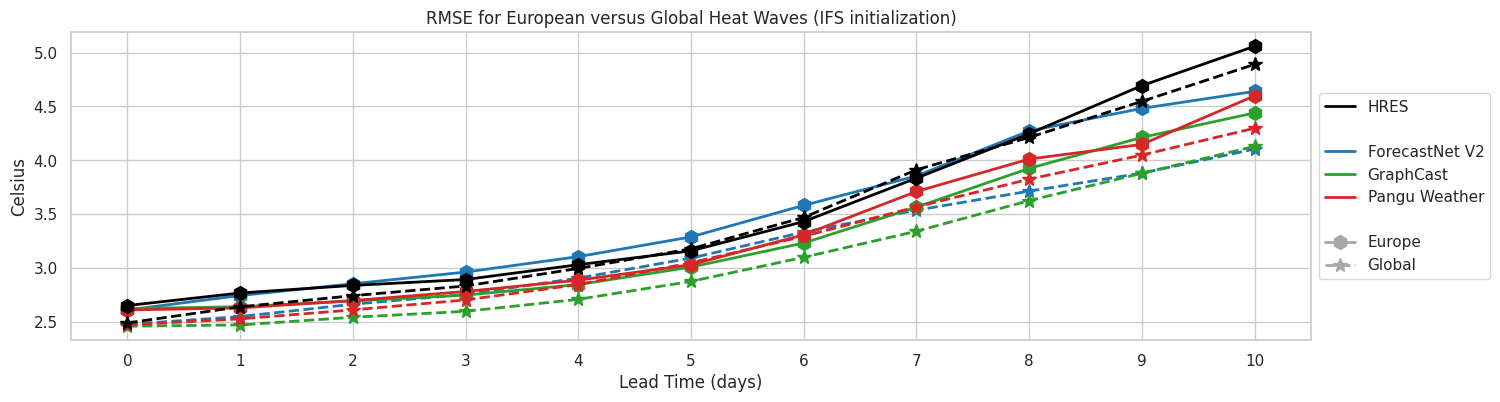

In [15]:
# plot the results for the european cases
eu_fourv2_ifs_settings = fourv2_ifs_cira_settings | fourv2_style | eu_group_style
eu_gc_ifs_settings = gc_ifs_cira_settings | gc_style | eu_group_style
eu_pangu_ifs_settings = pangu_ifs_cira_settings | pangu_style | eu_group_style
eu_hres_settings = hres_ifs_settings | hres_style | eu_group_style

# subset the data for the plots
eu_fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_case_ids)
eu_gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_case_ids)
eu_pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_case_ids)
eu_hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=eu_case_ids)

# plot the results
data = [eu_fourv2_ifs_plot, fourv2_ifs_plot, eu_gc_ifs_plot, gc_ifs_plot, eu_pangu_ifs_plot, pangu_ifs_plot, eu_hres_plot, hres_plot]
settings = [eu_fourv2_ifs_settings, fourv2_ifs_global_settings, eu_gc_ifs_settings, gc_ifs_global_settings, 
    eu_pangu_ifs_settings, pangu_ifs_global_settings, eu_hres_settings, hres_settings_global]
plot_results_by_metric(data=data, settings=settings, title='RMSE for European versus Global Heat Waves (IFS initialization)')

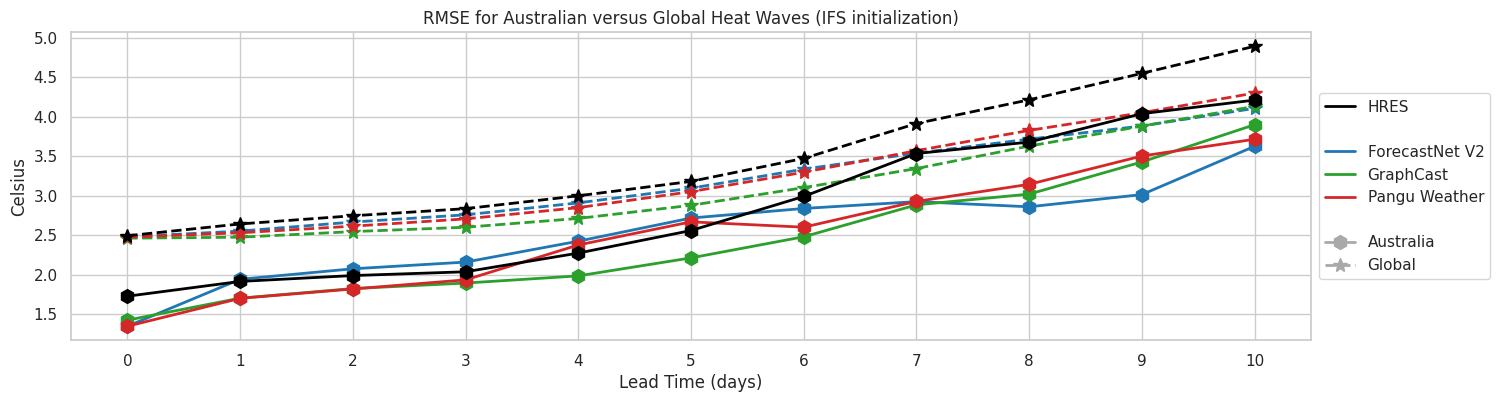

In [16]:
# plot the results for the australian cases
au_fourv2_ifs_settings = fourv2_ifs_cira_settings | fourv2_style | au_group_style
au_gc_ifs_settings = gc_ifs_cira_settings | gc_style | au_group_style
au_pangu_ifs_settings = pangu_ifs_cira_settings | pangu_style | au_group_style
au_hres_settings = hres_ifs_settings | hres_style | au_group_style

# subset the data for the plots
au_fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)
au_gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)
au_pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)
au_hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=au_case_ids)

# plot the results
data = [au_fourv2_ifs_plot, fourv2_ifs_plot, au_gc_ifs_plot, gc_ifs_plot, au_pangu_ifs_plot, pangu_ifs_plot, au_hres_plot, hres_plot]
settings = [au_fourv2_ifs_settings, fourv2_ifs_global_settings, au_gc_ifs_settings, gc_ifs_global_settings, 
    au_pangu_ifs_settings, pangu_ifs_global_settings, au_hres_settings, hres_settings_global]
plot_results_by_metric(data=data, settings=settings, title='RMSE for Australian versus Global Heat Waves (IFS initialization)')



# dive into one example in depth

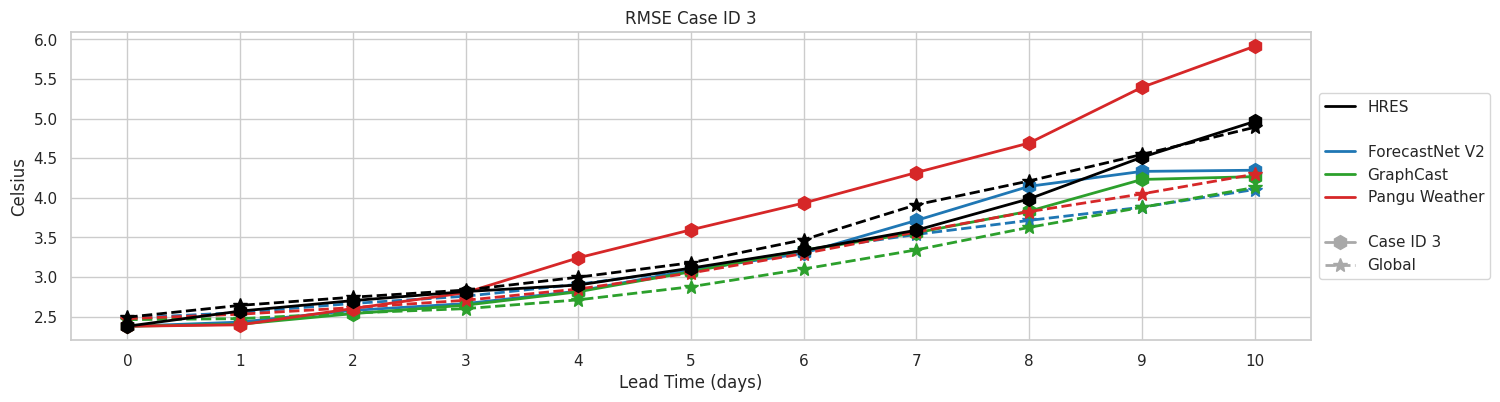

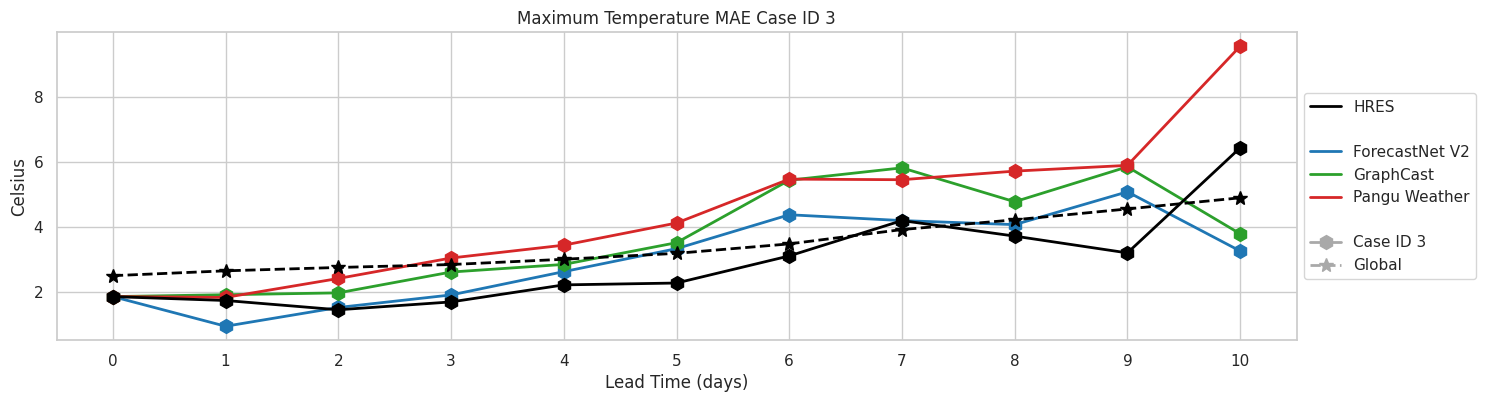

In [17]:
# for this example, we dive into case id 3
my_case = ewb_cases.select_cases('case_id_number',3)[0]

# make a style for the case id 3
my_group_style = {'linestyle':'-', 'marker':'h', 'group':'Case ID 3'}

# make the settings for the plots
my_fourv2_ifs_settings = fourv2_ifs_cira_settings | fourv2_style | my_group_style
my_gc_ifs_settings = gc_ifs_cira_settings | gc_style | my_group_style
my_pangu_ifs_settings = pangu_ifs_cira_settings | pangu_style | my_group_style
my_hres_settings = hres_ifs_settings | hres_style | my_group_style

# subset the data for the plots
my_fourv2_ifs_plot = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_gc_ifs_plot = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_pangu_ifs_plot = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_hres_plot = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='rmse', init_time='zeroz', case_id_list=[my_case.case_id_number])

# plot the results
data = [my_fourv2_ifs_plot, fourv2_ifs_plot, my_gc_ifs_plot, gc_ifs_plot, my_pangu_ifs_plot, pangu_ifs_plot, my_hres_plot, hres_plot]    
settings = [my_fourv2_ifs_settings, fourv2_ifs_settings | global_group_style, my_gc_ifs_settings, 
    gc_ifs_settings | global_group_style, my_pangu_ifs_settings, pangu_ifs_settings | global_group_style, my_hres_settings, 
    hres_settings | global_group_style]
plot_results_by_metric(data=data, settings=settings, title='RMSE Case ID 3')

# and make one more plot for the maximum temperature mae (same settings, just different data to plot)
my_fourv2_ifs_plot2 = subset_results_to_xarray(results_df=fourv2_results, forecast_source=fourv2_ifs_settings['forecast_source'], 
                                                     target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_gc_ifs_plot2 = subset_results_to_xarray(results_df=gc_results, forecast_source=gc_ifs_settings['forecast_source'], 
                                                 target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_pangu_ifs_plot2 = subset_results_to_xarray(results_df=pang_results, forecast_source=pangu_ifs_settings['forecast_source'],
                                           target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])
my_hres_plot2 = subset_results_to_xarray(results_df=hres_results, forecast_source=hres_settings['forecast_source'], 
                                    target_source='GHCN', metric='maximum_mae', init_time='zeroz', case_id_list=[my_case.case_id_number])

data = [my_fourv2_ifs_plot2, my_gc_ifs_plot2, my_pangu_ifs_plot2, my_hres_plot2, hres_plot]    
settings = [my_fourv2_ifs_settings, my_gc_ifs_settings, my_pangu_ifs_settings, my_hres_settings, hres_settings_global]
plot_results_by_metric(data=data, settings=settings, title='Maximum Temperature MAE Case ID 3')


/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'ls'
  result = super().contour(*args, **kwargs)


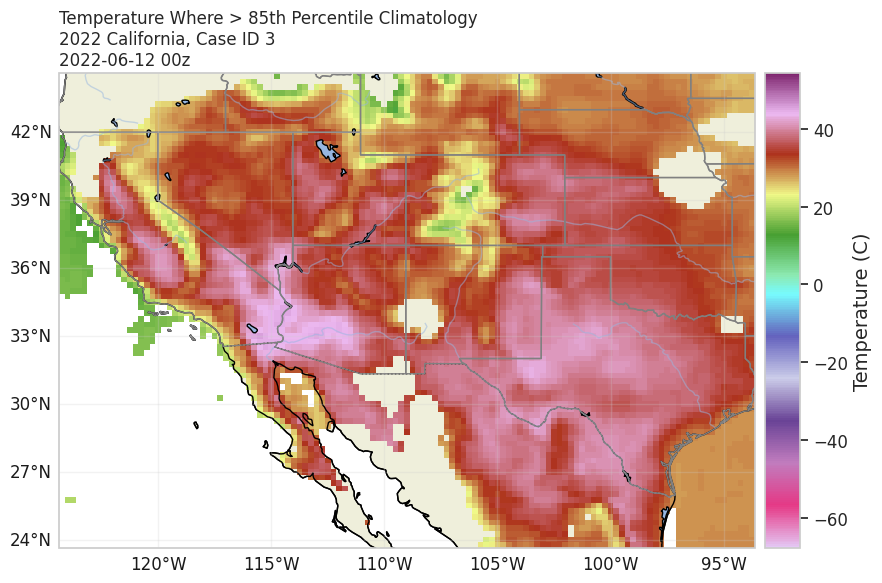

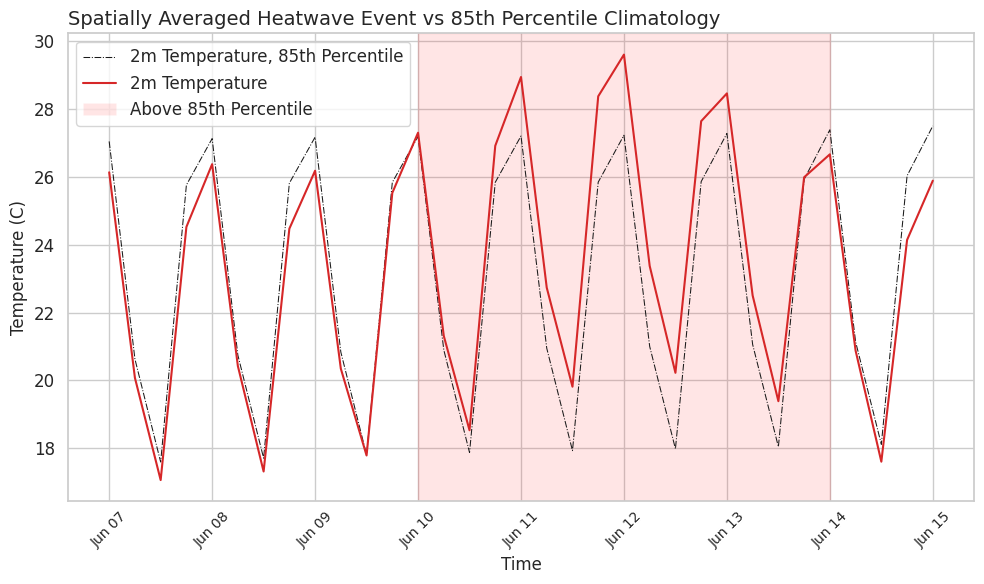

In [20]:
# show the individual data for this case
era5 = defaults.era5_heatwave_target.open_and_maybe_preprocess_data_from_source()
temp_climatology_ds = xr.open_zarr('gs://extremeweatherbench/datasets/surface_air_temperature_1990_2019_climatology.zarr/')
temp_climatology_ds = temp_climatology_ds.sel(quantile=0.85)
# load in all of the events in the yaml file
heatwave_dataset = cp.generate_heatwave_dataset(era5, temp_climatology_ds, my_case)
cp.generate_heatwave_plots(heatwave_dataset, my_case)